Simple class to import depth dose example data in dosrznrc.(url=https://github.com/nrc-cnrc/EGSnrc/blob/master/HEN_HOUSE/user_codes/dosrznrc/examples/depth_dose_example.egsinp)

- [Functions to explore file](#Functions-to-explore-file)
- [Create class for plot data](#Create-class-for-plot-data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Functions to explore file

First develop a function to load .plotdat file

In [2]:
ls

Depth dose class_v2_27_9_2016.ipynb  water_1_5_dd.plotdat
RC_all_water_521nd.pegs4dat          water_2_0.egsinp
air.egsinp                           water_2_0_dd.plotdat
air_dd.plotdat                       water_2_5.egsinp
archive/                             water_2_5_dd.plotdat
water_0_5.egsinp                     water_3_0.egsinp
water_0_5_dd.plotdat                 water_3_0_dd.plotdat
water_1_0.egsinp                     water_3_5.egsinp
water_1_0_dd.plotdat                 water_3_5_dd.plotdat
water_1_5.egsinp


# Class for dd plot data

In [3]:
class dose_2d(object):
   'Common base class for depth dose and profile plots'
   def __init__(self, file):        
    data = np.genfromtxt(file, dtype=None, skip_header=16, skip_footer=1)   # load data, X, Y, error
    self.X = data[:,0]
    self.Y = data[:,1]
    self.error = data[:,2]
    
    self.header = np.genfromtxt(file, dtype='str', max_rows=15, delimiter='@') 
    self.plot_type = self.header[0][1][8:]
    self.plot_title = self.header[1][1][10:]
    self.xaxis_label= self.header[8][1][17:]
    yaxis_label_= self.header[10][1][17:]
    self.yaxis_label = yaxis_label_.replace('\\\\S2\\\\N"', '') #  note this creates a new string   

   def plot_dd(self):
    plt.plot(self.X, self.Y)
    #plt.title(self.plot_title)
    plt.xlabel(self.xaxis_label)
    plt.ylabel(self.yaxis_label) 
    plt.show()

In [4]:
air = dose_2d('air_dd.plotdat')

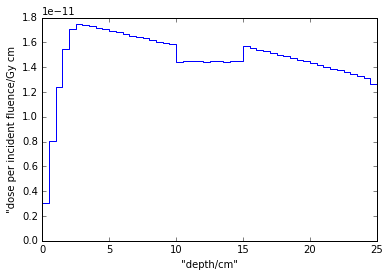

In [5]:
air.plot_dd()

In [7]:
w_0_5 = dose_2d('water_0_5_dd.plotdat')

In [8]:
w_1_0 = dose_2d('water_1_0_dd.plotdat')

In [9]:
w_1_5 = dose_2d('water_1_5_dd.plotdat')

In [10]:
w_2_0 = dose_2d('water_2_0_dd.plotdat')

In [11]:
w_2_5 = dose_2d('water_2_5_dd.plotdat')

In [12]:
w_3_0 = dose_2d('water_3_0_dd.plotdat')

In [13]:
w_3_5 = dose_2d('water_3_5_dd.plotdat')

In [16]:
w_4_0 = dose_2d('water_4_0_dd.plotdat')

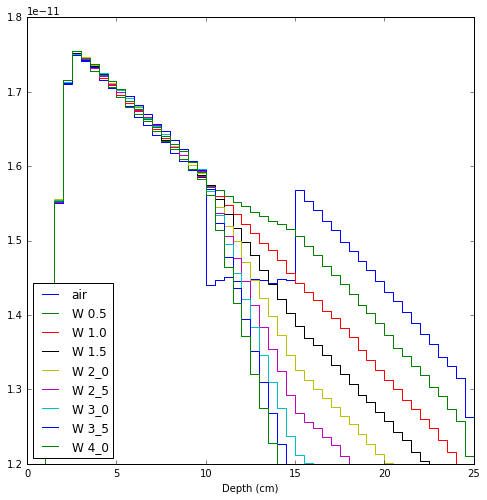

In [17]:
plt.figure(figsize=(8,8))
plt.plot(air.X,air.Y,'b', label='air') # plotting t,b separately 
plt.plot(w_0_5.X,w_0_5.Y,'g', label='W 0.5') # plotting t,c separately 
plt.plot(w_1_0.X,w_1_0.Y,'r', label='W 1.0') # plotting t,c separately 
plt.plot(w_1_5.X,w_1_5.Y,'k', label='W 1.5') # plotting t,c separately 
plt.plot(w_2_0.X,w_2_0.Y,'y', label='W 2_0') # plotting t,c separately 
plt.plot(w_2_5.X,w_2_5.Y,'m', label='W 2_5') # plotting t,c separately
plt.plot(w_3_0.X,w_3_0.Y,'c', label='W 3_0') # plotting t,c separately 
plt.plot(w_3_5.X,w_3_5.Y,'b', label='W 3_5') # plotting t,c separately 
plt.plot(w_4_0.X,w_4_0.Y,'g', label='W 4_0') # plotting t,c separately 

plt.xlabel('Depth (cm)')
plt.ylim([1.2e-11, 1.8e-11])
plt.legend(loc=3)
plt.show()

In [27]:
index = 80
print(air.X[index], air.Y[index])

13.25 1.4469e-11


In [73]:
density = np.linspace(0, 4, num=9, endpoint=True)
density

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ])

In [74]:
egs_dose = np.zeros(shape=9)
index = 80
print('depth of : '+ str(air.X[index])) 
egs_dose[0] = air.Y[index]
egs_dose[1] = w_0_5.Y[index]
egs_dose[2] = w_1_0.Y[index]
egs_dose[3] = w_1_5.Y[index]
egs_dose[4] = w_2_0.Y[index]
egs_dose[5] = w_2_5.Y[index]
egs_dose[6] = w_3_0.Y[index]
egs_dose[7] = w_3_5.Y[index]
egs_dose[8] = w_4_0.Y[index]

depth of : 13.25


In [75]:
egs_dose

array([  1.44690000e-11,   1.53290000e-11,   1.49640000e-11,
         1.46080000e-11,   1.42280000e-11,   1.38370000e-11,
         1.34560000e-11,   1.30940000e-11,   1.27560000e-11])

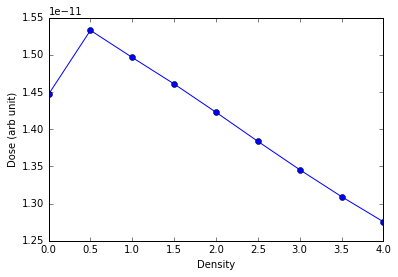

In [76]:
plt.plot(density, egs_dose, 'o-')
plt.xlabel('Density')
plt.ylabel('Dose (arb unit)')

In [81]:
np.savetxt("egs_dose.csv", np.c_[density, egs_dose], delimiter=",", header='Density, dose')

In [52]:
ls

Depth dose class_v2_27_9_2016.ipynb  water_1_5_dd.plotdat
RC_all_water_521nd.pegs4dat          water_2_0.egsinp
air.egsinp                           water_2_0_dd.plotdat
air_dd.plotdat                       water_2_5.egsinp
archive/                             water_2_5_dd.plotdat
egs_dose.csv                         water_3_0.egsinp
water_0_5.egsinp                     water_3_0_dd.plotdat
water_0_5_dd.plotdat                 water_3_5.egsinp
water_1_0.egsinp                     water_3_5_dd.plotdat
water_1_0_dd.plotdat                 water_4_0.egsinp
water_1_5.egsinp                     water_4_0_dd.plotdat
